# The Evolution of the 3-pointer in the NBA

In [140]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
sns.set_context('poster')

In [114]:
df = pd.DataFrame(columns=['year', 'rank', 'team', 'points_from_3'])
for year in range(2004, 2018):
    html = requests.get('https://www.teamrankings.com/nba/stat/points-from-3-pointers?date=' + str(year) + '-06-16')
    bs = BeautifulSoup(html.text, 'html.parser')

    results = []
    for i in bs.find('table', {'class':'tr-table datatable scrollable'}):
        try:
            results.append(i.text)
        except:
            pass

    
    header = results[0].split('\n')
    body = results[1].split('\n')
    x = 2
    for i in range(30):
        row = body[x:x+3]
        row.insert(0, header[4])
        if len(row) == 4:
            df.loc[len(df)] = row
        x += 10
    
    sleep(1)

In [117]:
print df.shape
print df.dtypes
df.head()

(419, 4)
year             object
rank             object
team             object
points_from_3    object
dtype: object


,year,rank,team,points_from_3
0,2003,1,Okla City,26.5
1,2003,2,Sacramento,21.4
2,2003,3,Boston,20.0
3,2003,4,New Orleans,19.3
4,2003,5,Houston,18.6


In [122]:
df.year = df.year.astype(int)
df.rank = df['rank'].astype(int)
df.points_from_3 = df.points_from_3.astype(float)

In [135]:
min3 = pd.DataFrame(df.groupby('year').points_from_3.min()).reset_index()
min3= min3.merge(df.drop('rank', axis=1), on=['year', 'points_from_3'])
min3

,year,points_from_3,team
0,2003,9.0,Cleveland
1,2004,8.5,LA Clippers
2,2005,10.9,Orlando
3,2006,10.4,Philadelphia
4,2007,10.7,Philadelphia
5,2008,12.0,Okla City
6,2009,12.6,Memphis
7,2010,11.3,Memphis
8,2011,11.8,New Orleans
9,2012,14.0,Memphis


In [136]:
max3 = pd.DataFrame(df.groupby('year').points_from_3.max()).reset_index()
max3 = max3.merge(df.drop('rank', axis=1), on=['year', 'points_from_3'])
max3

,year,points_from_3,team
0,2003,26.5,Okla City
1,2004,28.6,Phoenix
2,2005,30.0,Phoenix
3,2006,27.5,Phoenix
4,2007,29.1,Orlando
5,2008,30.1,New York
6,2009,30.6,Orlando
7,2010,27.8,New York
8,2011,30.1,Orlando
9,2012,31.9,Houston


In [151]:
avg3 = pd.DataFrame(df.groupby('year').points_from_3.mean()).reset_index()
# avg3 = avg3.merge(df.drop('rank', axis=1), on=['year', 'points_from_3'])
avg3

,year,points_from_3
0,2003,15.534483
1,2004,16.786667
2,2005,17.113333
3,2006,18.133333
4,2007,19.516667
5,2008,19.876667
6,2009,19.250000
7,2010,19.296667
8,2011,19.100000
9,2012,21.380000


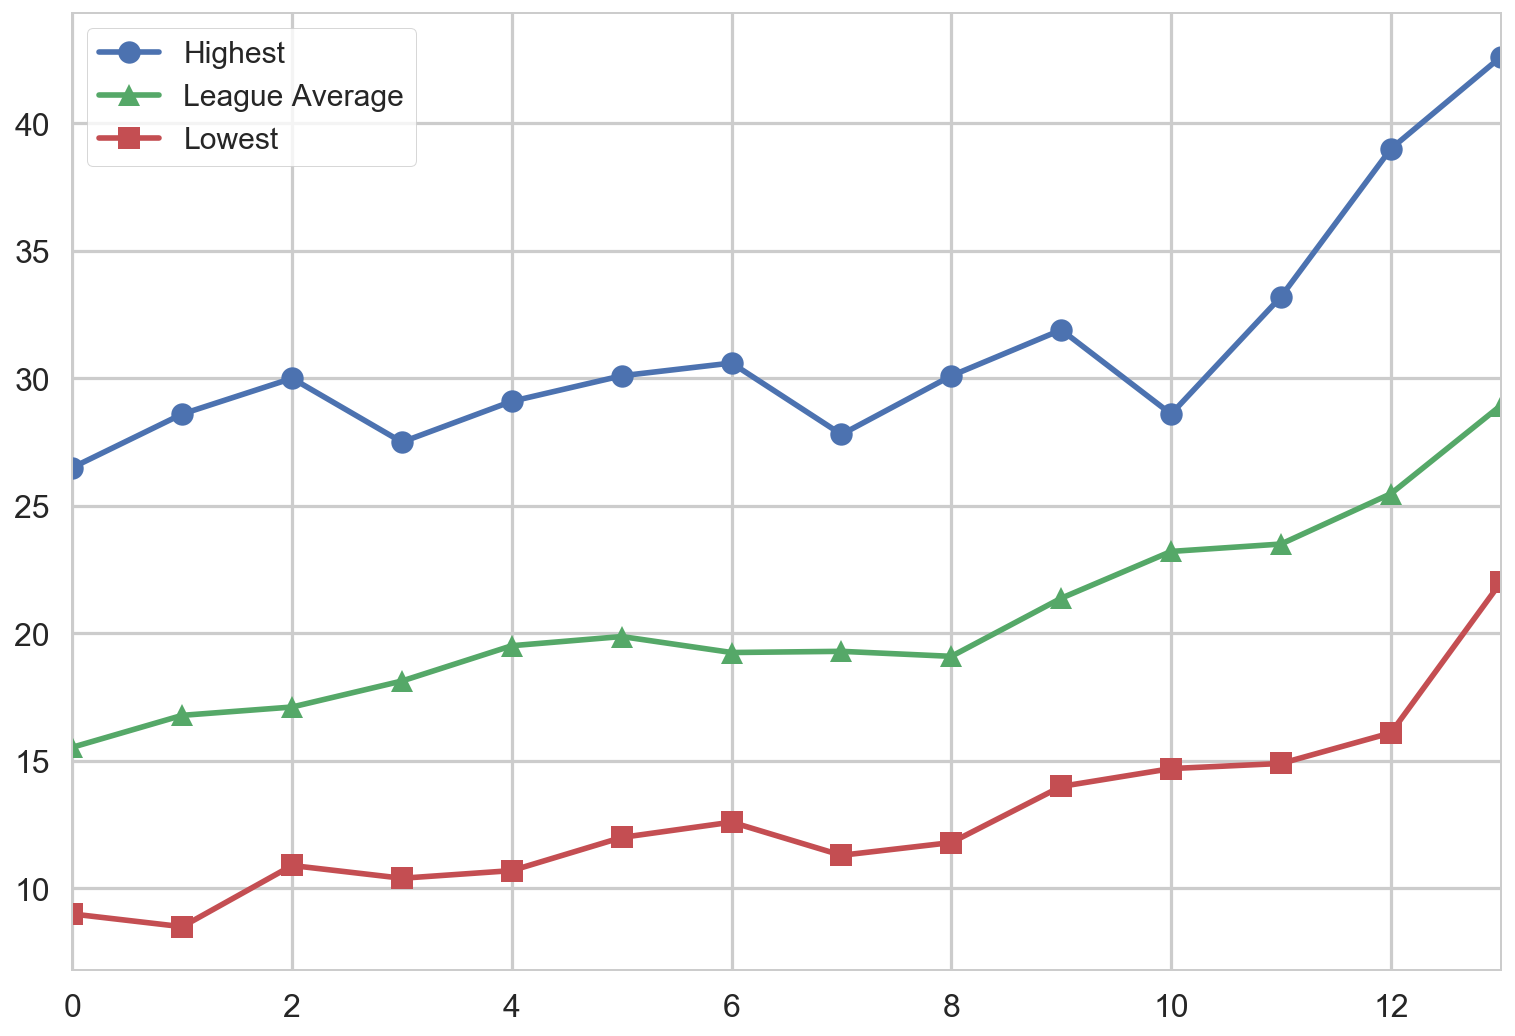

In [163]:
max3.points_from_3.plot(marker='o')
avg3.points_from_3.plot(marker='^')
min3.points_from_3.plot(marker='s')
plt.legend(loc=2, fontsize=15, frameon=True, fancybox=True, labels=['Highest', 'League Average', 'Lowest'])

In [158]:
df[df.team == 'Houston']

,year,rank,team,points_from_3
4,2003,5,Houston,18.6
34,2004,6,Houston,20.3
75,2005,17,Houston,17.2
91,2006,3,Houston,25.4
128,2007,10,Houston,21.1
155,2008,7,Houston,22.3
183,2009,5,Houston,23.6
213,2010,5,Houston,24.8
248,2011,10,Houston,21.7
269,2012,1,Houston,31.9
